In [ ]:
import sys
sys.executable

In [ ]:
#!'/Library/Developer/CommandLineTools/usr/bin/python3' -m pip install smote_variants

In [ ]:
#!'/Library/Developer/CommandLineTools/usr/bin/python3' -m pip install imblearn

In [65]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [66]:
import smote_variants as sv

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [68]:
pd.options.mode.chained_assignment = None

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [70]:
clinical = pd.read_csv('/Users/madhuri/Desktop/MasterThesis/Part2/ClinicalDF1.csv')

In [71]:
gene_data = pd.read_csv('/Users/madhuri/Desktop/MasterThesis/Part2/final_gene_list.csv')

In [72]:
gene_data.head()

,X217398_x_at,X1007_s_at,X121_at,X200045_at,X200053_at,X200071_at,X200078_s_at,X200083_at,X200617_at,X200621_at,...,X220558_x_at,X220559_at,X220560_at,X220561_at,X220562_at,X220563_s_at,X220564_at,X220565_at,X220566_at,X220567_at
0,14.8671,11.0591,6.8277,9.5294,8.3286,9.3068,9.5442,9.3407,8.9275,10.1233,...,5.1859,4.2881,4.7643,5.2610,5.6335,4.2882,5.2773,5.2037,4.2883,4.2884
1,14.8777,11.1169,6.7891,9.5766,9.0341,9.5069,9.8331,8.8887,8.9703,9.9776,...,4.2640,5.5825,4.6809,4.2366,5.6856,4.6310,4.4076,5.5568,5.0411,4.6777
2,14.8518,10.9811,6.8793,9.3658,8.4623,9.4156,9.5450,9.1866,9.0396,9.9204,...,5.2548,5.1080,5.5434,4.4733,5.4211,5.6083,5.2171,4.4056,4.3341,4.8077
3,14.8416,10.6992,6.8515,9.4089,8.8189,9.3535,9.4884,9.1249,8.9817,10.0511,...,5.3894,4.4339,4.8631,4.5597,5.2773,5.1513,4.6724,4.4341,4.4342,4.4344
4,14.8518,11.0156,6.6954,9.6096,9.2547,9.2254,9.7614,9.2038,9.2665,10.0792,...,5.7820,5.4174,5.8110,4.9831,5.2830,5.3548,4.3360,4.3361,4.5812,4.3363


In [73]:
gene_data.shape

(6802, 20000)

In [74]:
#gene_data = gene_data.iloc[:,1:] #delete 'Unnamed' column

In [75]:
gene_data['CancerType']=clinical['CancerType']

In [76]:
dataframe=gene_data

In [77]:
X= dataframe.iloc[:, :-1]
y=dataframe['CancerType']



In [102]:
X_train,X_test_unscaled,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=30) 

In [79]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc= le.transform(y_train)
y_test_enc=le.transform(y_test)

In [80]:
# sns.countplot(y_train)
# plt.xticks(rotation=45)
# plt.show()

In [81]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [82]:

X_test=scaler.transform(X_test_unscaled)

In [83]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_samp, y_samp = resample.fit_resample(X_scaled, y_train_enc)


In [84]:

# sns.countplot(y_samp)
# plt.xticks(rotation=45)
# plt.title("SMOTE TOMEK Balancing")
# plt.savefig('Stomekcount.png')
# plt.show()

In [85]:
# le = LabelEncoder()
# le.fit(y_train)
# y_enc= le.transform(y_train)
# y_test=le.transform(y_test)

In [86]:
#y_test

In [87]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter = 1500)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)#make n_repeats=20
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_samp, y_samp, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.978 (0.004)


In [88]:
model.fit(X_samp,y_samp)

LogisticRegression(max_iter=1500, multi_class='multinomial', solver='sag')

In [89]:
y_pred=model.predict(X_test)

In [90]:
#y_pred

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(y_test_enc,y_pred)

array([[140,   1,   5,   0,   0,   0,   0,   0,   0,   0],
       [  0, 224,   2,   0,   1,   0,   0,   1,   0,   0],
       [  2,   2, 405,   1,  20,  10,   1,   4,   0,   1],
       [  1,   1,   2, 187,   5,   2,   1,   4,   0,   0],
       [  3,   2,  12,   2, 409,   1,   2,   0,   1,   2],
       [  0,   0,   1,   0,   0,  51,   0,   0,   0,   4],
       [  0,   0,   1,   1,  11,   2, 180,   1,   2,   0],
       [  0,   0,   1,   0,   0,   2,   1, 138,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 137,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  50]])

In [93]:
from sklearn import metrics
from sklearn.metrics import *

In [94]:
#f1_score(y_test_enc, y_pred, average='micro') #use macro for multiclass because micro gives same value as accuracy

In [95]:
f1_score(y_test_enc, y_pred, average='macro')

0.9367358367882082

In [96]:
metrics.accuracy_score(y_test_enc,y_pred)*100

94.12052915237629

In [151]:
print(metrics.classification_report(y_test_enc, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.960     0.986     0.973       146
           1      0.991     0.930     0.959       228
           2      0.953     0.908     0.930       446
           3      0.936     0.936     0.936       203
           4      0.889     0.942     0.915       434
           5      0.873     0.857     0.865        56
           6      0.946     0.889     0.917       198
           7      0.925     0.958     0.941       142
           8      0.958     0.986     0.971       138
           9      0.847     1.000     0.917        50

    accuracy                          0.934      2041
   macro avg      0.928     0.939     0.932      2041
weighted avg      0.935     0.934     0.934      2041



In [100]:
y_test_enc

array([4, 4, 4, ..., 9, 1, 4])

In [109]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [110]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list


/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


TypeError: plot_roc_curve() missing 1 required positional argument: 'y'

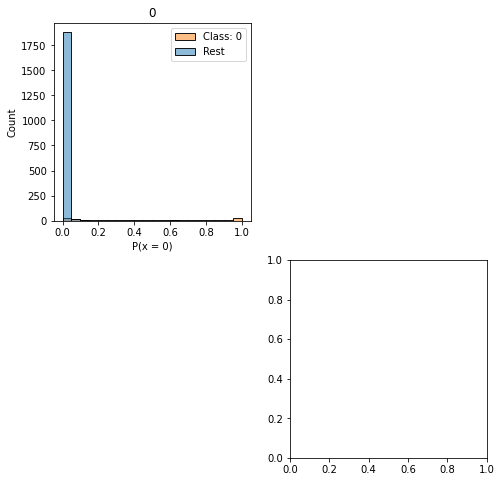

In [117]:
pd.options.mode.chained_assignment = None
y_proba = model.predict_proba(X_test_unscaled)

# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = model.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test_unscaled.copy()
    df_aux['class'] = [1 if k == c else 0 for k in y_test_enc]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3,i+5)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    #plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    metrics.plot_roc_curve(tpr, fpr)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

In [131]:
# Compute ROC curve and ROC area for each class
y_score = model.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_enc[i], y_score[i])
    #roc_auc[i] = auc(fpr[i], tpr[i])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
# Then interpolate all ROC curves at this points)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Finally average it and compute AUC
mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


TypeError: Singleton array 4 cannot be considered a valid collection.